# Understanding importance of date_range() of pandas. 
We have the data of Apple Stock prices from Jun 01, 2017 till Jul 31, 2017, stored in a csv file - 'AAP_NoDate.csv'. For some reasons, the Date column is missing. Date is a must for Time Series problems. 


# Load the Data

In [1]:
import pandas as pd
df = pd.read_csv('AAP_NoDate.csv')
print(df.head())                                  # Observe that there is no date column and the indexes are integers starting 0


         Open        High         Low       Close   Adj Close    Volume
0  153.169998  153.330002  152.220001  153.179993  149.785507  16404100
1  153.580002  155.449997  152.889999  155.449997  152.005219  27770700
2  154.339996  154.449997  153.460007  153.929993  150.518890  25331700
3  153.899994  155.809998  153.779999  154.449997  151.027374  26624900
4  155.020004  155.979996  154.479996  155.369995  151.926987  21069600


# Include the Date column:
This is stocks data. Stock markets are non operational over the weekends. Take a note of this fact when specifying the frequency of date generation. 

In [2]:
dates = pd.date_range(start = '2017-06-01', end = '2017-07-31' , freq='B')    # 'B' stands for business dates. 
print(dates)

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30', '2017-07-03', '2017-07-04',
               '2017-07-05', '2017-07-06', '2017-07-07', '2017-07-10',
               '2017-07-11', '2017-07-12', '2017-07-13', '2017-07-14',
               '2017-07-17', '2017-07-18', '2017-07-19', '2017-07-20',
               '2017-07-21', '2017-07-24', '2017-07-25', '2017-07-26',
               '2017-07-27', '2017-07-28', '2017-07-31'],
              dtype='datetime64[ns]', freq='B')


# Set the newly added Date column as an INDEX to the existing DataFrame.

In [3]:
df.set_index(dates, inplace=True)            # This step will work only when the "dates" has the same length as that of our data
                                             # The argument inplace=True is needed to ensure that the changes are made in the same DataFrame. 
                                             # If we skip this argument, a new DataFrame will be returned. 

# Ensure whether the Date index has been added 
print(df)

# Access the index column
print(df.index)

# Print the type of the index field. It should not be a [string] rather a [Timestamp]
print(type(df.index[0]))

                  Open        High         Low       Close   Adj Close  \
2017-06-01  153.169998  153.330002  152.220001  153.179993  149.785507   
2017-06-02  153.580002  155.449997  152.889999  155.449997  152.005219   
2017-06-05  154.339996  154.449997  153.460007  153.929993  150.518890   
2017-06-06  153.899994  155.809998  153.779999  154.449997  151.027374   
2017-06-07  155.020004  155.979996  154.479996  155.369995  151.926987   
2017-06-08  155.250000  155.539993  154.399994  154.990005  151.555420   
2017-06-09  155.190002  155.190002  146.020004  148.979996  145.678589   
2017-06-12  145.740005  146.089996  142.509995  145.419998  142.197479   
2017-06-13  147.160004  147.449997  145.149994  146.589996  143.341537   
2017-06-14  147.500000  147.500000  143.839996  145.160004  141.943237   
2017-06-15  143.320007  144.479996  142.210007  144.289993  141.092514   
2017-06-16  143.779999  144.500000  142.199997  142.270004  139.117294   
2017-06-19  143.660004  146.740005  14

# Plot the data
Lets plot the closing stock price against the dates. The Dates (the indexes) are on the lhorizontal axis while the stock prices are on the y-axis.

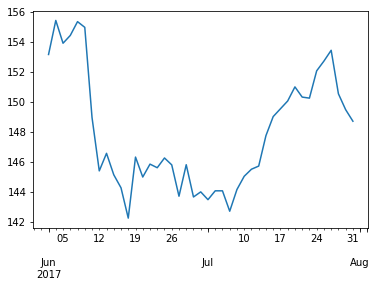

In [4]:
%matplotlib inline
df.Close.plot()                       # Using the pandas wrapper for matplotlib for quick plotting


# Slicing the data
Lets say we are interested in getting only the data that corresponds to the first 10 days of June

In [5]:
df['2017-06-01':'2017-06-10']


,Open,High,Low,Close,Adj Close,Volume
2017-06-01,153.169998,153.330002,152.220001,153.179993,149.785507,16404100
2017-06-02,153.580002,155.449997,152.889999,155.449997,152.005219,27770700
2017-06-05,154.339996,154.449997,153.460007,153.929993,150.518890,25331700
2017-06-06,153.899994,155.809998,153.779999,154.449997,151.027374,26624900
2017-06-07,155.020004,155.979996,154.479996,155.369995,151.926987,21069600
2017-06-08,155.250000,155.539993,154.399994,154.990005,151.555420,21250800
2017-06-09,155.190002,155.190002,146.020004,148.979996,145.678589,64882700


# Compute the average of the closing price for the first 10 days

In [6]:
df['2017-06-01':'2017-06-10'].Close.mean()

153.76428228571427

# Changing the index/data frequency to Daily (D) - i.e. including all days of the week including weekends. Stock market is closed on weekend.
We need to specify a method for filling the data for weekends. 
In this case we use the method "pad" which carries forward the data entry of Friday and uses the same for Saturday and Sunday

In [7]:
df.asfreq('D', method = 'pad')

# Inference: Observe that previously there were no entries for 3rd and 4th of June, 2017. 
# But now 2 additional rows have been added and the data entry of Friday is used to fill the entries for Saturday and Sunday. 

,Open,High,Low,Close,Adj Close,Volume
2017-06-01,153.169998,153.330002,152.220001,153.179993,149.785507,16404100
2017-06-02,153.580002,155.449997,152.889999,155.449997,152.005219,27770700
2017-06-03,153.580002,155.449997,152.889999,155.449997,152.005219,27770700
2017-06-04,153.580002,155.449997,152.889999,155.449997,152.005219,27770700
2017-06-05,154.339996,154.449997,153.460007,153.929993,150.518890,25331700
2017-06-06,153.899994,155.809998,153.779999,154.449997,151.027374,26624900
2017-06-07,155.020004,155.979996,154.479996,155.369995,151.926987,21069600
2017-06-08,155.250000,155.539993,154.399994,154.990005,151.555420,21250800
2017-06-09,155.190002,155.190002,146.020004,148.979996,145.678589,64882700
2017-06-10,155.190002,155.190002,146.020004,148.979996,145.678589,64882700


# Changing the index/data frequency to Weekly (W)

In [8]:
df.asfreq('W', method='pad')

,Open,High,Low,Close,Adj Close,Volume
2017-06-04,153.580002,155.449997,152.889999,155.449997,152.005219,27770700
2017-06-11,155.190002,155.190002,146.020004,148.979996,145.678589,64882700
2017-06-18,143.779999,144.500000,142.199997,142.270004,139.117294,50361100
2017-06-25,145.130005,147.160004,145.110001,146.279999,143.038422,35439400
2017-07-02,144.449997,144.960007,143.779999,144.020004,140.828522,23024100
2017-07-09,142.899994,144.750000,142.899994,144.179993,140.984940,19201700
2017-07-16,147.970001,149.330002,147.330002,149.039993,145.737244,20132100
2017-07-23,149.990005,150.440002,148.880005,150.270004,146.940033,26252600
2017-07-30,149.889999,150.229996,149.190002,149.500000,146.187073,17213700


# Changing the index/data frequency to Hourly (H)

In [9]:
df.asfreq('H', method='pad')

,Open,High,Low,Close,Adj Close,Volume
2017-06-01 00:00:00,153.169998,153.330002,152.220001,153.179993,149.785507,16404100
2017-06-01 01:00:00,153.169998,153.330002,152.220001,153.179993,149.785507,16404100
2017-06-01 02:00:00,153.169998,153.330002,152.220001,153.179993,149.785507,16404100
2017-06-01 03:00:00,153.169998,153.330002,152.220001,153.179993,149.785507,16404100
2017-06-01 04:00:00,153.169998,153.330002,152.220001,153.179993,149.785507,16404100
2017-06-01 05:00:00,153.169998,153.330002,152.220001,153.179993,149.785507,16404100
2017-06-01 06:00:00,153.169998,153.330002,152.220001,153.179993,149.785507,16404100
2017-06-01 07:00:00,153.169998,153.330002,152.220001,153.179993,149.785507,16404100
2017-06-01 08:00:00,153.169998,153.330002,152.220001,153.179993,149.785507,16404100
2017-06-01 09:00:00,153.169998,153.330002,152.220001,153.179993,149.785507,16404100


# Generating index using "periods"
In the previous cells we generated the dates, using the date_range(). Here we specified both the start and the end dates. what if we have the data and know only the start date? To determine the end date automatically we use the "periods" parameter.
Lets explore it. 

In [10]:
# Lets first generate fictitious random data
import numpy as np
data_fict = np.random.randint(low=1, high=10, size=72)                  # Generating 72 random integers between 1 to 10. 
print(type(data_fict))                                                  # [numpy.ndarray]

# Convert the numpy.ndarray into pandas dataframe
data_fict = pd.DataFrame(data_fict)
print(data_fict)
print(type(data_fict))                                                  # Pandas DataFrame

# Now generate the dates using pandas date_range()
dates = pd.date_range(start='2019-01-01', periods=72, freq='H')         # We generated 72 datetime stamps on hourly basis.   
print(dates)

# Lets add the dates as index to our fictitious time series data
data_fict.set_index(dates, inplace=True)                                #  Set the date as index. The inplace parameter ensures   
print(data_fict)                                                        # that the DataFrame is modified in place. 



<class 'numpy.ndarray'>
    0
0   8
1   1
2   3
3   6
4   3
5   2
6   3
7   7
8   3
9   3
10  8
11  2
12  1
13  9
14  2
15  8
16  6
17  9
18  3
19  5
20  2
21  3
22  2
23  2
24  3
25  5
26  4
27  7
28  6
29  4
.. ..
42  5
43  6
44  2
45  6
46  2
47  4
48  3
49  6
50  1
51  9
52  1
53  6
54  1
55  9
56  3
57  3
58  7
59  6
60  6
61  9
62  1
63  5
64  9
65  1
66  3
67  7
68  5
69  1
70  4
71  1

[72 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               '2019-01-01 10:00:00', '2019-01-01 11:00:00',
               '2019-01-01 12:00:00', '2019-01-01 13:00:00',
               '2019-01-01 14:00:00', '2019-01-01 15:00:00',
               '2019-01-01 16:00:00', '2019-01-01 17:00